In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
#import suicide csv

df=pd.read_csv("../data/suicide_rate.csv")

In [3]:
#import depression csv

df1=pd.read_csv('../data/prevalence-of-depression-by-age.csv')

In [4]:
#start cleaning. age needs to be changed for final merge

df['age'].value_counts()

df['age']=df['age'].str.replace(' ','').str.replace(r'\W','')


In [5]:
#confirm

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,1524years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,3554years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,1524years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,2534years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
#change age

df['age']=(df['age'].str.replace("75years","35+ years")
                    .str.replace("2534years","25-34 years")
                    .str.replace("3554years","35+ years")
                    .str.replace("1524years","15-24 years")
                    .str.replace("5574years","35+ years")
                    .str.replace("514years","14- years"))

In [7]:
#group by

dfa=df.groupby(['country','year','age'], as_index=False).agg({'suicides/100k pop':'mean'})

In [8]:
#confirming groupby

dfa

,country,year,age,suicides/100k pop
0,Albania,1987,14- years,0.000000
1,Albania,1987,15-24 years,5.770000
2,Albania,1987,25-34 years,2.420000
3,Albania,1987,35+ years,2.578333
4,Albania,1988,14- years,0.000000
...,...,...,...,...
9263,Uzbekistan,2013,35+ years,6.133333
9264,Uzbekistan,2014,14- years,1.920000
9265,Uzbekistan,2014,15-24 years,11.345000
9266,Uzbekistan,2014,25-34 years,8.765000


In [9]:
#check if in columns

dfa.columns

Index(['country', 'year', 'age', 'suicides/100k pop'], dtype='object')

In [10]:
#cleaning second dataset

df1.head()

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent),Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.594676,3.455708,4.417802,5.175856,5.799034,3.218871,4.939766,5.917752,5.202803,4.071831
1,Afghanistan,AFG,1991,1.588356,3.451880,4.433524,5.176729,5.814828,3.203468,4.902682,5.927093,5.192849,4.079531
2,Afghanistan,AFG,1992,1.577980,3.434982,4.453689,5.160249,5.829745,3.156559,4.837097,5.945656,5.176872,4.088358
3,Afghanistan,AFG,1993,1.577201,3.420210,4.464517,5.148767,5.853060,3.120655,4.813657,5.966915,5.167355,4.096190
4,Afghanistan,AFG,1994,1.570846,3.425222,4.462960,5.148227,5.852851,3.082179,4.839340,5.975907,5.157549,4.099582


In [11]:
#check columns to transpose

df1.columns

Index(['Entity', 'Code', 'Year',
       'Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)'],
      dtype='object')

In [12]:
#transpose with melt

df2=df1.melt(['Entity','Year'],value_vars=['Prevalence - Depressive disorders - Sex: Both - Age: 10 to 14 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 15 to 19 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 20 to 24 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 25 to 29 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 30 to 34 (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 15-49 years (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 50-69 years (Percent)','Prevalence - Depressive disorders - Sex: Both - Age: 70+ years (Percent)'])

In [13]:
#confirm

df2.head()

,Entity,Year,variable,value
0,Afghanistan,1990,Prevalence - Depressive disorders - Sex: Both ...,1.594676
1,Afghanistan,1991,Prevalence - Depressive disorders - Sex: Both ...,1.588356
2,Afghanistan,1992,Prevalence - Depressive disorders - Sex: Both ...,1.577980
3,Afghanistan,1993,Prevalence - Depressive disorders - Sex: Both ...,1.577201
4,Afghanistan,1994,Prevalence - Depressive disorders - Sex: Both ...,1.570846


In [14]:
#confirm as columns

df2.columns

Index(['Entity', 'Year', 'variable', 'value'], dtype='object')

In [15]:
#eliminate spaces and characters

df2['variable']=df2['variable'].str.replace(' ','').str.replace(r'\W','')

In [16]:
#check names to replace according to the other table

df2['variable'].value_counts()

PrevalenceDepressivedisordersSexBothAgeAllAgesPercent      6468
PrevalenceDepressivedisordersSexBothAge25to29Percent       6468
PrevalenceDepressivedisordersSexBothAge10to14Percent       6468
PrevalenceDepressivedisordersSexBothAge5069yearsPercent    6468
PrevalenceDepressivedisordersSexBothAge1549yearsPercent    6468
PrevalenceDepressivedisordersSexBothAge30to34Percent       6468
PrevalenceDepressivedisordersSexBothAge15to19Percent       6468
PrevalenceDepressivedisordersSexBothAge20to24Percent       6468
PrevalenceDepressivedisordersSexBothAge70yearsPercent      6468
Name: variable, dtype: int64

In [17]:
#change age name to match first table

df2['variable']=(df2['variable'].str.replace("PrevalenceDepressivedisordersSexBothAge70yearsPercent","35+ years" )
                                .str.replace("PrevalenceDepressivedisordersSexBothAge15to19Percent","15-24 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge25to29Percent","25-34 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge20to24Percent","15-24 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge5069yearsPercent","35+ years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge10to14Percent", "14- years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge30to34Percent", "25-34 years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAge1549yearsPercent","35+ years")
                                .str.replace("PrevalenceDepressivedisordersSexBothAgeAllAgesPercent", "All ages"))

In [18]:
#confirm its successful

df2["variable"].value_counts()


35+ years      19404
15-24 years    12936
25-34 years    12936
All ages        6468
14- years       6468
Name: variable, dtype: int64

In [19]:
#groupby 

df2a=df2.groupby(['Entity','Year','variable'], as_index=False).agg({'value':'mean'})

df2a

,Entity,Year,variable,value
0,Afghanistan,1990,14- years,1.594676
1,Afghanistan,1990,15-24 years,3.936755
2,Afghanistan,1990,25-34 years,5.487445
3,Afghanistan,1990,35+ years,5.353440
4,Afghanistan,1990,All ages,3.218871
...,...,...,...,...
32335,Zimbabwe,2017,14- years,1.073118
32336,Zimbabwe,2017,15-24 years,2.651559
32337,Zimbabwe,2017,25-34 years,3.205170
32338,Zimbabwe,2017,35+ years,5.509123


In [20]:
#confirm it is as columns

df2a.columns

Index(['Entity', 'Year', 'variable', 'value'], dtype='object')

In [21]:
#merging

final_df = dfa.merge(df2a, left_on=['country','year','age'], right_on = ['Entity','Year','variable'])

In [22]:
#check if successful

final_df

,country,year,age,suicides/100k pop,Entity,Year,variable,value
0,Albania,1992,14- years,0.000000,Albania,1992,14- years,0.876335
1,Albania,1992,15-24 years,2.900000,Albania,1992,15-24 years,2.178477
2,Albania,1992,25-34 years,2.175000,Albania,1992,25-34 years,2.400357
3,Albania,1992,35+ years,1.308333,Albania,1992,35+ years,3.465856
4,Albania,1993,14- years,0.280000,Albania,1993,14- years,0.877473
...,...,...,...,...,...,...,...,...
7875,Uzbekistan,2013,35+ years,6.133333,Uzbekistan,2013,35+ years,4.695778
7876,Uzbekistan,2014,14- years,1.920000,Uzbekistan,2014,14- years,1.055283
7877,Uzbekistan,2014,15-24 years,11.345000,Uzbekistan,2014,15-24 years,2.888759
7878,Uzbekistan,2014,25-34 years,8.765000,Uzbekistan,2014,25-34 years,3.150176


In [23]:
#rename column about % depression

final_df=final_df.rename(columns={"value": "depression"})

In [24]:
#drop duplicated columns

dropcol=['Entity','Year','variable']

final_df=final_df.drop(dropcol, axis=1)

In [25]:
final_df

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473
...,...,...,...,...,...
7875,Uzbekistan,2013,35+ years,6.133333,4.695778
7876,Uzbekistan,2014,14- years,1.920000,1.055283
7877,Uzbekistan,2014,15-24 years,11.345000,2.888759
7878,Uzbekistan,2014,25-34 years,8.765000,3.150176


In [26]:
final_df.to_csv('depsuicide.csv')

In [27]:
final_df['year'].value_counts()

2009    340
2001    336
2010    336
2002    328
2007    328
2003    328
2000    324
2008    324
2011    324
2006    324
2004    320
2005    316
1999    312
2012    312
2013    308
1998    304
2014    300
1996    296
1995    296
1997    296
1994    260
1993    252
1992    248
1991    244
1990    240
2015    236
2016     48
Name: year, dtype: int64

In [28]:
#adding rural df

dfrural=pd.read_excel("../data/rural_excel.xls")

In [29]:
dfrural.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,Last Updated Date,2020-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,...,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000
3,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599,91.316,91.024,90.724,90.414,90.096,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246


In [30]:
dfrural.columns = dfrural.iloc[2]

In [31]:
dfrural.head()

2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
0,Last Updated Date,2020-09-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.000,1961.000,1962.000,1963.000,1964.000,1965.000,...,2010.000,2011.000,2012.000,2013.000,2014.000,2015.000,2016.000,2017.000,2018.000,2019.000
3,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.599,91.316,91.024,90.724,90.414,90.096,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246


In [32]:
dfrural=dfrural.drop([0,1])

In [33]:
todrop=['Country Code','Indicator Name','Indicator Code']
        
dfrural=dfrural.drop(todrop, axis=1)

In [34]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
dfrural.drop(dfrural.columns[cols],axis=1,inplace=True)

In [35]:
dfrural=dfrural.drop([2])

In [36]:
#dfrural.columns=dfrural.columns.str.replace(' ','')

#.str.replace(r'.0','')

In [37]:
#dfrural=dfrural.rename(columns={"1990.0": "1990"})

In [38]:
dfrural.head()

2,Country Name,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,...,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,Aruba,49.681,49.696,50.002,50.412,50.823,51.233,51.644,52.054,52.464,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,78.823,78.734,78.645,78.556,78.466,78.376,78.286,78.195,78.105,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246
5,Angola,62.856,61.420,59.961,58.489,57.000,55.831,54.654,53.475,52.290,...,40.217,39.472,38.732,37.998,37.269,36.554,35.851,35.161,34.486,33.823
6,Albania,63.572,63.300,62.751,62.201,61.646,61.089,60.527,59.965,59.399,...,47.837,46.753,45.670,44.613,43.577,42.566,41.579,40.617,39.681,38.771
7,Andorra,5.288,5.470,5.676,5.889,6.110,6.339,6.575,6.820,7.073,...,11.181,11.274,11.369,11.463,11.559,11.655,11.752,11.850,11.938,12.016


In [39]:
dfrural.columns=['Country name', '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']

In [40]:
dfrural.head()

,Country name,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,Aruba,49.681,49.696,50.002,50.412,50.823,51.233,51.644,52.054,52.464,...,56.941,57.060,57.043,57.010,56.959,56.892,56.808,56.707,56.589,56.454
4,Afghanistan,78.823,78.734,78.645,78.556,78.466,78.376,78.286,78.195,78.105,...,76.263,76.052,75.840,75.627,75.413,75.197,74.980,74.750,74.505,74.246
5,Angola,62.856,61.420,59.961,58.489,57.000,55.831,54.654,53.475,52.290,...,40.217,39.472,38.732,37.998,37.269,36.554,35.851,35.161,34.486,33.823
6,Albania,63.572,63.300,62.751,62.201,61.646,61.089,60.527,59.965,59.399,...,47.837,46.753,45.670,44.613,43.577,42.566,41.579,40.617,39.681,38.771
7,Andorra,5.288,5.470,5.676,5.889,6.110,6.339,6.575,6.820,7.073,...,11.181,11.274,11.369,11.463,11.559,11.655,11.752,11.850,11.938,12.016


In [41]:
dfrural2=dfrural.melt(['Country name'],var_name="Year",value_name="Rural area")

In [42]:
dfrural2

,Country name,Year,Rural area
0,Aruba,1990,49.681
1,Afghanistan,1990,78.823
2,Angola,1990,62.856
3,Albania,1990,63.572
4,Andorra,1990,5.288
...,...,...,...
7915,Kosovo,2019,NaN
7916,"Yemen, Rep.",2019,62.727
7917,South Africa,2019,33.144
7918,Zambia,2019,55.928


In [43]:
#finalruraldf=final_df.concat(dfrural2, left_on=['country','year'], right_on=['Country name','Year'])

#final_df = dfa.merge(df2a, left_on=['country','year','age'], right_on = ['Entity','Year','variable'])

#finalruraldf=pd.concat

In [44]:
#dfr1 = pd.final_df(columns=['country', 'year','suicides/100k pop', 'depression'])
#dfr2=pd.dfrural2(columns=['Rural area'])

#pd.concat([dfr1, dfr2])

In [45]:
#pd.concat([dfrural2, final_df], join='inner',axis=1)

In [46]:
dfrural2.head()

,Country name,Year,Rural area
0,Aruba,1990,49.681
1,Afghanistan,1990,78.823
2,Angola,1990,62.856
3,Albania,1990,63.572
4,Andorra,1990,5.288


In [47]:
final_df.head()

,country,year,age,suicides/100k pop,depression
0,Albania,1992,14- years,0.000000,0.876335
1,Albania,1992,15-24 years,2.900000,2.178477
2,Albania,1992,25-34 years,2.175000,2.400357
3,Albania,1992,35+ years,1.308333,3.465856
4,Albania,1993,14- years,0.280000,0.877473


In [48]:
dfdep=final_df.copy()
dfdep2=dfrural2.copy()

In [49]:
dfdep=dfdep.groupby(['country','year'], as_index=False).agg({'suicides/100k pop':'mean','depression':'mean'})

#df2a=df2.groupby(['Entity','Year','variable'], as_index=False).agg({'value':'mean'})

dfdep

,country,year,suicides/100k pop,depression
0,Albania,1992,1.595833,2.230256
1,Albania,1993,2.860833,2.236942
2,Albania,1994,2.090000,2.245163
3,Albania,1995,3.317917,2.252920
4,Albania,1996,3.736667,2.261308
...,...,...,...,...
1969,Uzbekistan,2010,5.221250,2.954389
1970,Uzbekistan,2011,5.767500,2.953330
1971,Uzbekistan,2012,6.632917,2.951567
1972,Uzbekistan,2013,6.790833,2.949253


In [50]:
dfdep2.dtypes
dfdep2['Year']=pd.to_numeric(dfdep2['Year'],downcast='integer')
dfdep2['Rural area']=pd.to_numeric(dfdep2['Rural area'],downcast='integer')

In [51]:
dfdep2.dtypes

Country name     object
Year              int16
Rural area      float64
dtype: object

In [52]:
dfdep.dtypes

country               object
year                   int64
suicides/100k pop    float64
depression           float64
dtype: object

In [53]:
dftrial = dfdep.merge(dfdep2, left_on=['country','year'], right_on = ['Country name','Year'])

In [54]:
dftrial=dftrial.drop(['Country name','Year'], axis=1)

In [55]:
dftrial

,country,year,suicides/100k pop,depression,Rural area
0,Albania,1992,1.595833,2.230256,62.751
1,Albania,1993,2.860833,2.236942,62.201
2,Albania,1994,2.090000,2.245163,61.646
3,Albania,1995,3.317917,2.252920,61.089
4,Albania,1996,3.736667,2.261308,60.527
...,...,...,...,...,...
1876,Uzbekistan,2010,5.221250,2.954389,49.044
1877,Uzbekistan,2011,5.767500,2.953330,48.850
1878,Uzbekistan,2012,6.632917,2.951567,48.950
1879,Uzbekistan,2013,6.790833,2.949253,49.050


In [56]:
yo=dftrial.groupby('country', as_index=False).agg({'suicides/100k pop':'mean','depression':'mean','Rural area':'mean'})

In [57]:
#to csv

dftrial.to_csv('rural_depression.csv')

In [58]:
yo

,country,suicides/100k pop,depression,Rural area
0,Albania,3.415417,2.278600,56.412105
1,Antigua and Barbuda,0.396098,2.612769,69.514045
2,Argentina,8.141811,3.916675,10.507500
3,Armenia,2.257561,2.732754,35.338120
4,Australia,11.380733,5.126570,15.077600
...,...,...,...,...
83,United Arab Emirates,1.240903,2.947744,16.808500
84,United Kingdom,6.229567,4.223303,20.272692
85,United States,11.021138,5.047128,20.917346
86,Uruguay,15.390525,3.596152,7.368478


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

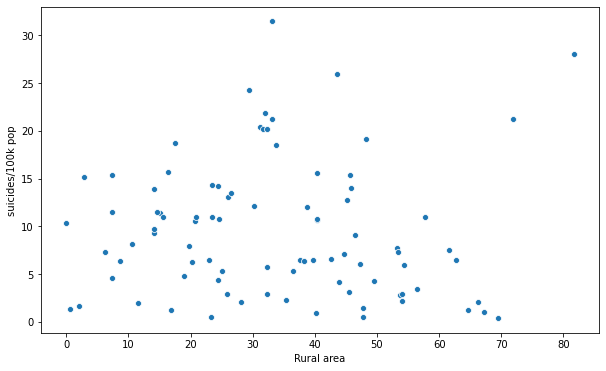

In [63]:

fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=yo,
                x="Rural area",
                y="suicides/100k pop",
                ax=ax);

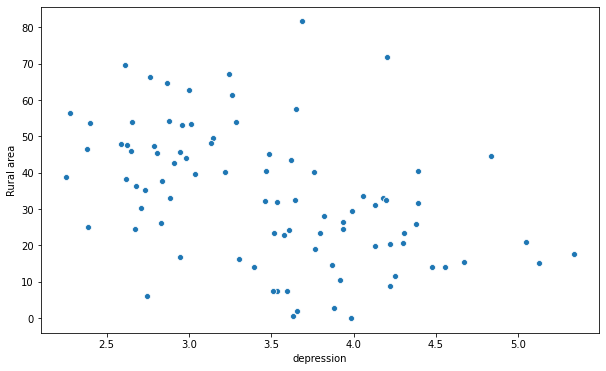

In [64]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=yo,
                x="depression",
                y="Rural area",
                ax=ax);

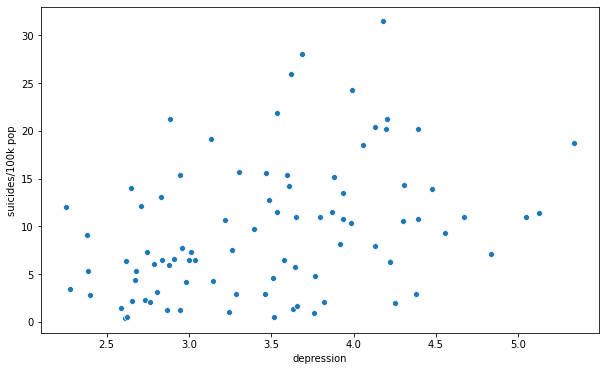

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=yo,
                x="depression",
                y="suicides/100k pop",
                ax=ax);